<a href="https://colab.research.google.com/github/qaisalzaghal/HealingCall/blob/main/Healing_Call.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#**Collecting data**

In [ ]:
df=pd.read_csv('/content/Symptom2Disease.csv')
df.head()

,Unnamed: 0,label,text
0,0,Psoriasis,I have been experiencing a skin rash on my arm...
1,1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,2,Psoriasis,I have been experiencing joint pain in my fing...
3,3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,4,Psoriasis,"My nails have small dents or pits in them, and..."


In [ ]:
df.tail(20)

,Unnamed: 0,label,text
1180,280,diabetes,I've been drinking more water and urinating mo...
1181,281,diabetes,"My vision is foggy, and it appears to be growi..."
1182,282,diabetes,My throat and mouth are dry. I've also been ge...
1183,283,diabetes,My wound is recovering more slowly now. Both m...
1184,284,diabetes,"My emotions change, and I have difficulties fo..."
1185,285,diabetes,My entire body is trembling and shaky. I've lo...
1186,286,diabetes,"I get skin irritations and rashes, especially ..."
1187,287,diabetes,I frequently feel the want to urinate and have...
1188,288,diabetes,"I have breathing problems, especially when I'm..."
1189,289,diabetes,I have a dry cough that never stops. I have pa...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1200 non-null   int64 
 1   label       1200 non-null   object
 2   text        1200 non-null   object
dtypes: int64(1), object(2)
memory usage: 28.3+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
label,0
text,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Unnamed: 0', 'label', 'text'], dtype='object')

In [ ]:
df["label"].value_counts()

,count
label,
Psoriasis,50
Varicose Veins,50
Typhoid,50
Chicken pox,50
Impetigo,50
Dengue,50
Fungal infection,50
Common Cold,50
Pneumonia,50


## Explore data balance

<ipython-input-11-1ceb66e1155f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df["label"].value_counts().index,


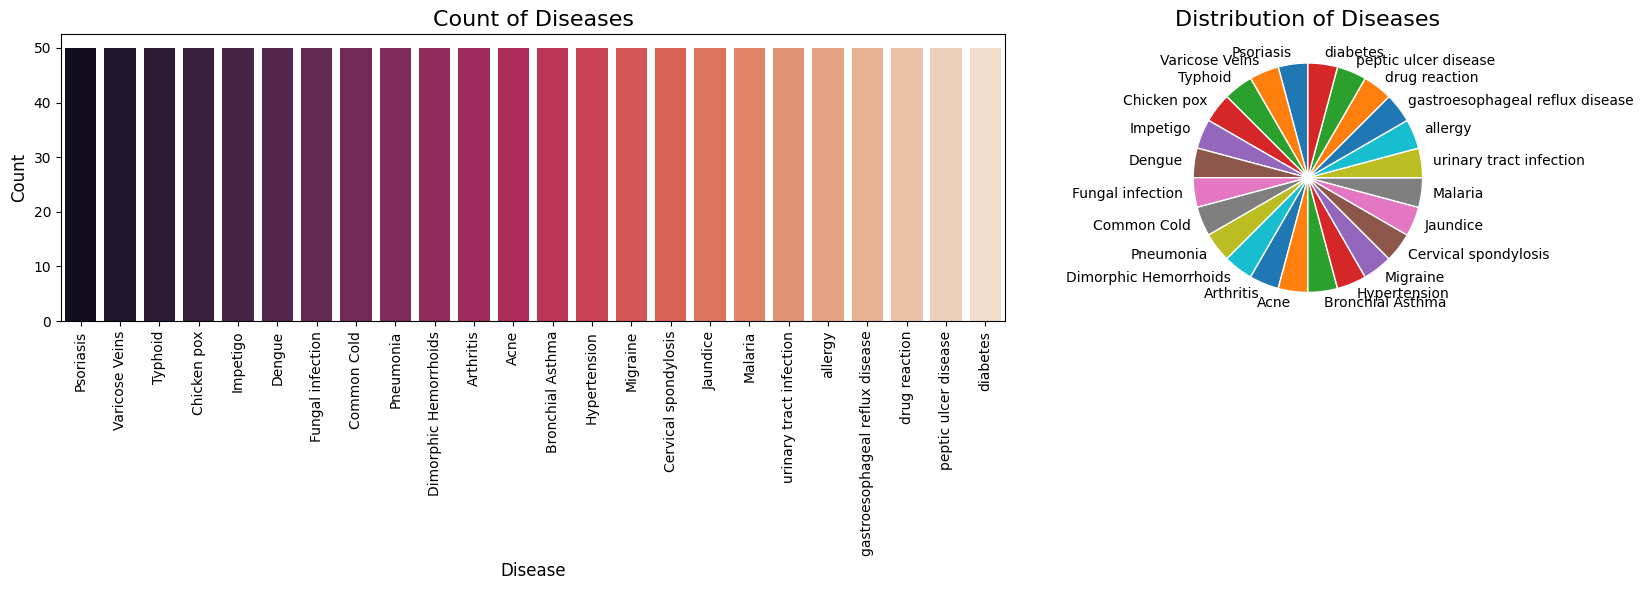

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
ax = sns.barplot(x=df["label"].value_counts().index,
                 y=df["label"].value_counts(),
                 palette="rocket")
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Count of Diseases", size=16)
plt.xticks(rotation=90)
plt.tight_layout()



plt.subplot(1, 2, 2)
counts = df["label"].value_counts()
plt.pie(counts,
        labels=counts.index,
        startangle=90,
        wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Distribution of Diseases", size=16)
plt.tight_layout()

plt.show()

## Take "text" as feature, "label" as label and drop "Unnamed: 0"

In [ ]:
df=df.drop("Unnamed: 0",axis=1)
df

,label,text
0,Psoriasis,I have been experiencing a skin rash on my arm...
1,Psoriasis,"My skin has been peeling, especially on my kne..."
2,Psoriasis,I have been experiencing joint pain in my fing...
3,Psoriasis,"There is a silver like dusting on my skin, esp..."
4,Psoriasis,"My nails have small dents or pits in them, and..."
...,...,...
1195,diabetes,I'm shaking and trembling all over. I've lost ...
1196,diabetes,"Particularly in the crevices of my skin, I hav..."
1197,diabetes,I regularly experience these intense urges and...
1198,diabetes,"I have trouble breathing, especially outside. ..."


In [ ]:
#df.to_csv('new_dataframe_disease.csv', index=False)

In [ ]:
#df=pd.read_csv("new_dataframe_disease.csv")

# Preprocessing data

In [ ]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("averaged_perceptron_tagger")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## remove stopwords and punctuations

In [ ]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_data(text):
  text =''.join([char for char in text if char not in string.punctuation])
  text=' '.join([word for word in text.split() if word not in stopwords.words('english')])
  text=text.lower()
  words = word_tokenize(text)
  return " ".join(words)

df["cleaned_text"] = df["text"].apply(preprocess_data)

df.head()


,label,text,cleaned_text
0,Psoriasis,I have been experiencing a skin rash on my arm...,i experiencing skin rash arms legs torso past ...
1,Psoriasis,"My skin has been peeling, especially on my kne...",my skin peeling especially knees elbows scalp ...
2,Psoriasis,I have been experiencing joint pain in my fing...,i experiencing joint pain fingers wrists knees...
3,Psoriasis,"There is a silver like dusting on my skin, esp...",there silver like dusting skin especially lowe...
4,Psoriasis,"My nails have small dents or pits in them, and...",my nails small dents pits often feel inflammat...


In [ ]:
#df.to_csv('new_dataframe_myproject_preprocess.csv', index=False)

In [ ]:
#df=pd.read_csv("new_dataframe_myproject_preprocess.csv")

## text length before and after preprocessing

In [ ]:
df["text_length"] = df["text"].apply(lambda x:len(x.split()))
df["cleaned_text_length"] = df["cleaned_text"].apply(lambda x:len(x.split()))
df=df[["text","text_length","cleaned_text","cleaned_text_length","label"]]
df.head()

,text,text_length,cleaned_text,cleaned_text_length,label
0,I have been experiencing a skin rash on my arm...,28,i experiencing skin rash arms legs torso past ...,16,Psoriasis
1,"My skin has been peeling, especially on my kne...",23,my skin peeling especially knees elbows scalp ...,14,Psoriasis
2,I have been experiencing joint pain in my fing...,28,i experiencing joint pain fingers wrists knees...,17,Psoriasis
3,"There is a silver like dusting on my skin, esp...",32,there silver like dusting skin especially lowe...,18,Psoriasis
4,"My nails have small dents or pits in them, and...",27,my nails small dents pits often feel inflammat...,14,Psoriasis


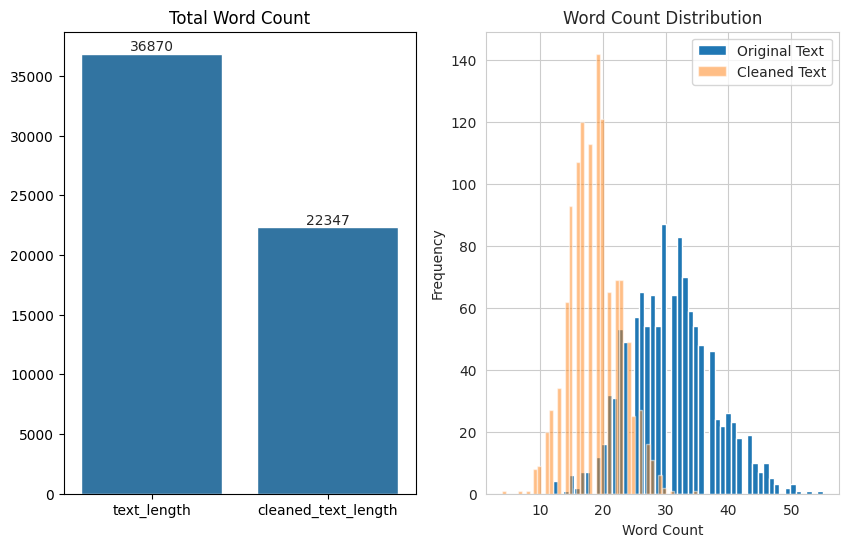

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 6))
fig.add_subplot(1, 2, 1)
sns.set_style("whitegrid")
x_labels = ["text_length", "cleaned_text_length"]
y_values = [df["text_length"].sum(), df["cleaned_text_length"].sum()]
sns.barplot(x=x_labels, y=y_values)
plt.title("Total Word Count")
for i, value in enumerate(y_values):
    plt.text(i, value , str(value), ha='center', va='bottom')


fig.add_subplot(1, 2, 2)
sns.set_style("whitegrid")
plt.hist(df["text_length"], bins=50, label="Original Text")
plt.hist(df["cleaned_text_length"], bins=50, alpha=0.5, label="Cleaned Text")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Word Count Distribution")
plt.legend()



## ---WordCloud--- before and after preprocessing

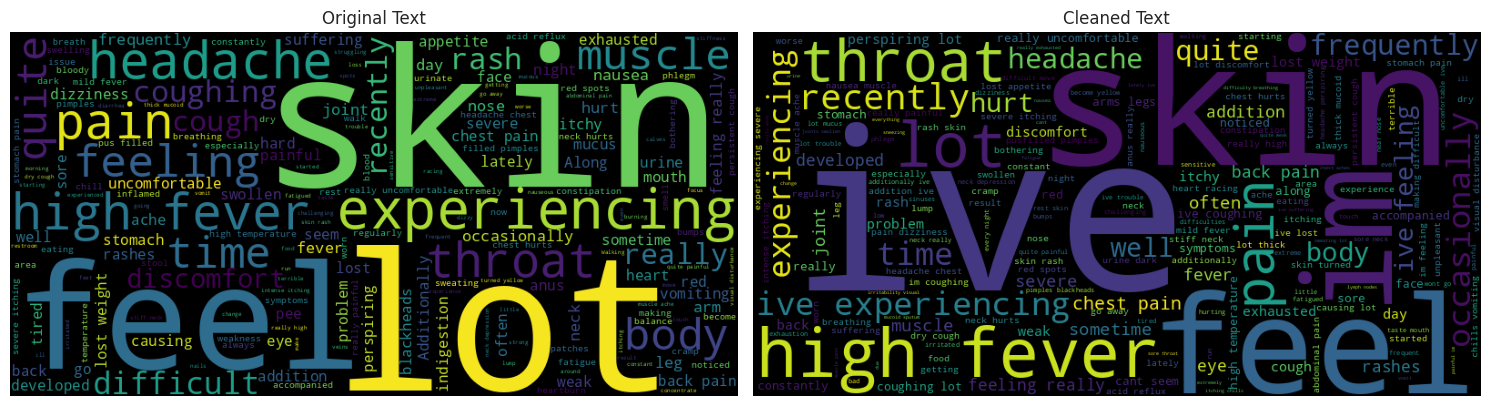

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
text = " ".join(df["text"].astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color="black", stopwords=STOPWORDS).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Original Text")

plt.subplot(1, 2, 2)
text_cleaned = " ".join(df["cleaned_text"].astype(str).tolist())
wordcloud_cleaned = WordCloud(width=800, height=400, background_color="black", stopwords=STOPWORDS).generate(text_cleaned)
plt.imshow(wordcloud_cleaned)
plt.axis("off")
plt.title("Cleaned Text")

plt.tight_layout()
plt.show()

In [ ]:
from nltk.stem import WordNetLemmatizer, SnowballStemmer

def get_lemmatized(text):
  lemmatizer = WordNetLemmatizer()
  lemmatized_words = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(lemmatized_words)

df["lemmatized_text"] = df["cleaned_text"].apply(get_lemmatized)

def get_stemmed(text):
  stemmer = SnowballStemmer('english')
  stemmed_words = [stemmer.stem(word) for word in text.split()]
  return " ".join(stemmed_words)

df["stemmed_text"] = df["lemmatized_text"].apply(get_stemmed)

df=df[["text","text_length","cleaned_text","cleaned_text_length","lemmatized_text","stemmed_text","label"]]

df.head()

<ipython-input-22-2744eeeb276b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lemmatized_text"] = df["cleaned_text"].apply(get_lemmatized)
<ipython-input-22-2744eeeb276b>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["stemmed_text"] = df["lemmatized_text"].apply(get_stemmed)


,text,text_length,cleaned_text,cleaned_text_length,lemmatized_text,stemmed_text,label
0,I have been experiencing a skin rash on my arm...,28,i experiencing skin rash arms legs torso past ...,16,i experiencing skin rash arm leg torso past we...,i experienc skin rash arm leg torso past week ...,Psoriasis
1,"My skin has been peeling, especially on my kne...",23,my skin peeling especially knees elbows scalp ...,14,my skin peeling especially knee elbow scalp th...,my skin peel especi knee elbow scalp this peel...,Psoriasis
2,I have been experiencing joint pain in my fing...,28,i experiencing joint pain fingers wrists knees...,17,i experiencing joint pain finger wrist knee th...,i experienc joint pain finger wrist knee the p...,Psoriasis
3,"There is a silver like dusting on my skin, esp...",32,there silver like dusting skin especially lowe...,18,there silver like dusting skin especially lowe...,there silver like dust skin especi lower back ...,Psoriasis
4,"My nails have small dents or pits in them, and...",27,my nails small dents pits often feel inflammat...,14,my nail small dent pit often feel inflammatory...,my nail small dent pit often feel inflammatori...,Psoriasis


In [ ]:
#!pip install gensim


# preparing data for ML models

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])
df.head()

,text,text_length,cleaned_text,cleaned_text_length,lemmatized_text,stemmed_text,label
0,I have been experiencing a skin rash on my arm...,28,i experiencing skin rash arms legs torso past ...,16,i experiencing skin rash arm leg torso past we...,i experienc skin rash arm leg torso past week ...,15
1,"My skin has been peeling, especially on my kne...",23,my skin peeling especially knees elbows scalp ...,14,my skin peeling especially knee elbow scalp th...,my skin peel especi knee elbow scalp this peel...,15
2,I have been experiencing joint pain in my fing...,28,i experiencing joint pain fingers wrists knees...,17,i experiencing joint pain finger wrist knee th...,i experienc joint pain finger wrist knee the p...,15
3,"There is a silver like dusting on my skin, esp...",32,there silver like dusting skin especially lowe...,18,there silver like dusting skin especially lowe...,there silver like dust skin especi lower back ...,15
4,"My nails have small dents or pits in them, and...",27,my nails small dents pits often feel inflammat...,14,my nail small dent pit often feel inflammatory...,my nail small dent pit often feel inflammatori...,15


In [ ]:
#df.to_csv('new_dataframe_myproject_stemmed_and_labeled.csv', index=False)


In [ ]:
#df=pd.read_csv("new_dataframe_myproject_stemmed_and_labeled.csv")

In [ ]:
#!pip install sentence-transformers


## Using Sentence Transformer Vectorization

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import cross_val_score


texts = df['cleaned_text'] #text
labels = df['label']

model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(texts)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (960, 384)
Testing data shape: (240, 384)


In [ ]:
"""
np.save("myproject_embeddings_using(all-MiniLM-L6-v2).npy", embeddings)
df['label'].to_csv("myproject_labels.csv", index=False)
"""
"""
X = np.load("myproject_embeddings_using(all-MiniLM-L6-v2).npy")
y = pd.read_csv("myproject_labels.csv").values.ravel()
"""

'\nX = np.load("myproject_embeddings_using(all-MiniLM-L6-v2).npy")\ny = pd.read_csv("myproject_labels.csv").values.ravel()\n'

## training Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
scores_LogisticRegression = cross_val_score(clf,  X_train, y_train, cv=5)

clf.fit(X_train, y_train)

y_pred_LogisticRegression = clf.predict(X_test)

print("Cross-validation scores:", scores_LogisticRegression)
print("Average Accuracy:", scores_LogisticRegression.mean())
print("Best Accuracy:", scores_LogisticRegression.max())

Cross-validation scores: [0.90104167 0.88541667 0.88020833 0.890625   0.90104167]
Average Accuracy: 0.8916666666666666
Best Accuracy: 0.9010416666666666


## training Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(n_estimators=100, random_state=42)
scores_RandomForestClassifier = cross_val_score(clf_1,  X_train, y_train, cv=5)

print("Cross-validation scores:", scores_RandomForestClassifier)
print("Average Accuracy:", np.mean(scores_RandomForestClassifier))
print("Best Accuracy:", scores_RandomForestClassifier.max())

Cross-validation scores: [0.953125   0.94270833 0.94791667 0.9375     0.94270833]
Average Accuracy: 0.9447916666666666
Best Accuracy: 0.953125


## using Gris Search CV to inhuncing the Logistic regression model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit( X_train, y_train)

print("Best params:", grid.best_params_)
print("Best accuracy:", grid.best_score_)


Best params: {'C': 10, 'solver': 'liblinear'}
Best accuracy: 0.9604166666666666


## compare the accuracy of all models

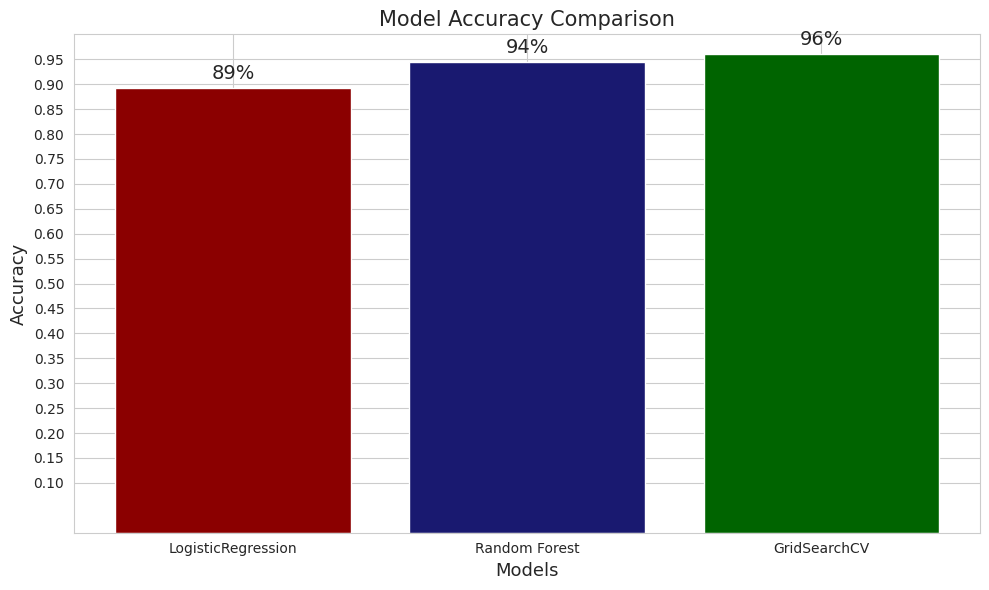

In [ ]:
score_values=[np.mean(scores_LogisticRegression), np.mean(scores_RandomForestClassifier), grid.best_score_]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.bar(
    ["LogisticRegression", "Random Forest", "GridSearchCV"],
    score_values,
    color = ['darkred', 'midnightblue', 'darkgreen']
)
for i, value in enumerate(score_values):
    plt.text(i, value + 0.01 , f"{value * 100:.0f}%" , ha='center', va='bottom',size=14)

plt.xlabel("Models",size=13)
plt.ylabel("Accuracy",size=13)
plt.title("Model Accuracy Comparison",size=15)
plt.ylim(0, 1)
plt.yticks(np.arange(0.1, 1.0, 0.05))
plt.tight_layout()

In [ ]:
#import joblib
"""
joblib.dump(grid, 'myproject_grid_model_trained.joblib')
"""

"""
loaded_model = joblib.load('myproject_grid_model_trained.joblib')
"""

"\nloaded_model = joblib.load('myproject_grid_model_trained.joblib')\n"

In [ ]:
"""
joblib.dump(X_train, 'X_train_myproject.pkl')
joblib.dump(X_test, 'X_test_myproject.pkl')
joblib.dump(y_train, 'y_train_myproject.pkl')
joblib.dump(y_test, 'y_test_myproject.pkl')
"""
"""
X_train = joblib.load('X_train_myproject.pkl')
X_test = joblib.load('X_test_myproject.pkl')
y_train = joblib.load('y_train_myproject.pkl')
y_test = joblib.load('y_test_myproject.pkl')
"""

"\nX_train = joblib.load('X_train_myproject.pkl')\nX_test = joblib.load('X_test_myproject.pkl')\ny_train = joblib.load('y_train_myproject.pkl')\ny_test = joblib.load('y_test_myproject.pkl')\n"

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = grid.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         7
           4       1.00      0.92      0.96        12
           5       1.00      1.00      1.00        12
           6       0.92      1.00      0.96        12
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00        13
           9       1.00      1.00      1.00        10
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        11
          13       1.00      1.00      1.00        10
          14       1.00      1.00      1.00        11
          15       0.83      0.83      0.83         6
          16       1.00    

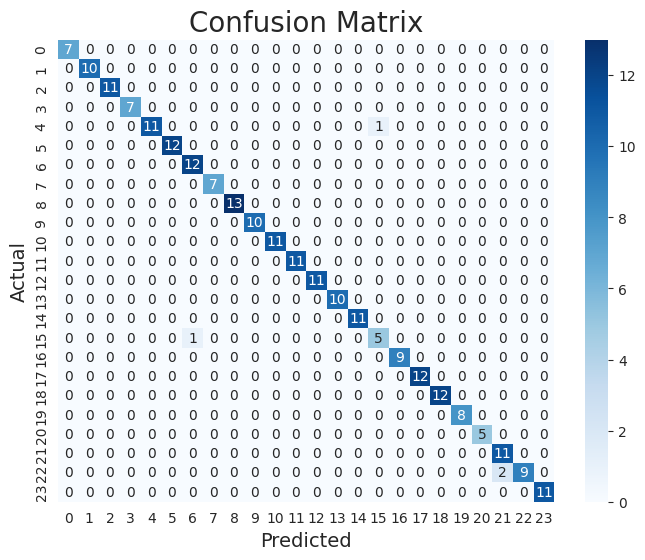

In [ ]:
from sklearn.metrics import confusion_matrix



cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix", size=20)
plt.xlabel("Predicted", size=14)
plt.ylabel("Actual", size=14)
plt.show()


In [ ]:
df_1=pd.read_csv("/content/Symptom2Disease.csv")
label_count_dict = dict(zip(df["label"].value_counts().index, df_1["label"].value_counts().index))


In [ ]:
test_texts = ["I feel very dizzy and tired, my head hurts me very much"]
test_texts_1=["I feel pain, swelling and heaviness in the legs, and it is often accompanied by a burning sensation and discomfort."]
test_texts_2=["I sneeze a lot, my eyes itch and water, and my skin breaks out in rashes after exposure to allergens."]
test_texts_3=["I feel itchy red spots all over my body, with fever, fatigue, and blisters that burst and form scabs."]

def pred(text):
  model_test = SentenceTransformer('all-MiniLM-L6-v2')
  test_embeddings = model_test.encode(text)

  output = grid.predict(test_embeddings)
  predicted_label = output[0]
  print(f"Predicted Label: {label_count_dict[predicted_label]}")
pred(test_texts)
pred(test_texts_1)
pred(test_texts_2)
pred(test_texts_3)

"""
Predicted Label: Hypertension
Predicted Label: Varicose Veins
Predicted Label: allergy
Predicted Label: Chicken pox
"""

Predicted Label: Hypertension
Predicted Label: Varicose Veins
Predicted Label: allergy
Predicted Label: Chicken pox


'\nPredicted Label: Hypertension\nPredicted Label: Varicose Veins\nPredicted Label: allergy\nPredicted Label: Chicken pox\n'

In [ ]:
label_count_dict

{15: 'Psoriasis',
 17: 'Varicose Veins',
 16: 'Typhoid',
 4: 'Chicken pox',
 10: 'Impetigo',
 6: 'Dengue',
 8: 'Fungal infection',
 5: 'Common Cold',
 14: 'Pneumonia',
 7: 'Dimorphic Hemorrhoids',
 1: 'Arthritis',
 0: 'Acne',
 2: 'Bronchial Asthma',
 9: 'Hypertension',
 13: 'Migraine',
 3: 'Cervical spondylosis',
 11: 'Jaundice',
 12: 'Malaria',
 23: 'urinary tract infection',
 18: 'allergy',
 21: 'gastroesophageal reflux disease',
 20: 'drug reaction',
 22: 'peptic ulcer disease',
 19: 'diabetes'}